Reading Data

# Modules

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Reading Data

In [204]:
data_raw = pd.read_csv('diabetes.csv')
data_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing

In [205]:
data_raw.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [206]:
data_raw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Filtering Junk Data
There are 0 values in Glucose, BP, Skin thickness,Insulin & BMI which needs to be eliminated. 

### Checking Junk Data 
### Pregnancy is 0 is be ok

In [207]:
def check_junk_data(target_data):
    Junk_Data ={}
    for i in target_data.columns[:-1]:
        sum_of_junk = (target_data[f'{i}'] == 0).sum() 
        Junk_Data[f'{i}'] = sum_of_junk 
    return Junk_Data    

In [208]:
def cleaning_data(target_data, label= 'Outcome',label_2= "Feature_Optional"):

    outcome_values = target_data[label].copy()  
    target_data = target_data.drop([label], axis=1)
    outcome_values2 = target_data[label_2].copy()  
    target_data = target_data.drop([label_2], axis=1)

    a_series = (target_data != 0).all(axis=1)
    new_df = target_data.loc[a_series]

    new_df.insert(len(target_data.columns), label, outcome_values, True)
    new_df.insert(len(target_data.columns), label_2, outcome_values2, True)
    return new_df 
    
data = cleaning_data(data_raw,'Outcome','Pregnancies')
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
3,89,66,23,94,28.1,0.167,21,1,0
4,137,40,35,168,43.1,2.288,33,0,1
6,78,50,32,88,31.0,0.248,26,3,1
8,197,70,45,543,30.5,0.158,53,2,1
13,189,60,23,846,30.1,0.398,59,1,1


## Comparision of Data vs Raw_Data In Respect To Outcome

Percentage Of Outcome Negative: 66.83673469387755 
Percentage Of Outcome Positive: 33.16326530612245


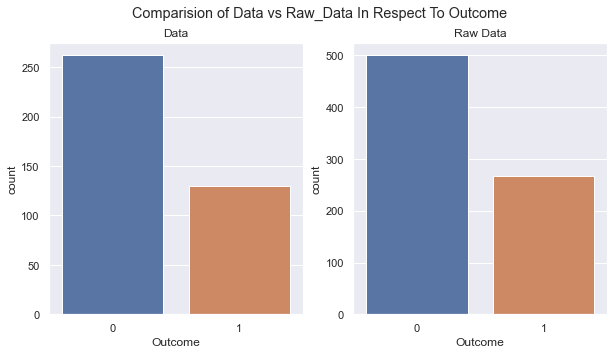

In [209]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Comparision of Data vs Raw_Data In Respect To Outcome')
# Data
sns.countplot(ax=axes[0],x=data.Outcome)
axes[0].set_title('Data')
# Raw Data
sns.countplot(ax=axes[1],x=data_raw.Outcome)
axes[1].set_title('Raw Data')

Noon = len(data[data.Outcome==0]) # Number of Outcome Negative
Noop = len(data[data.Outcome==1]) # Number of Outcome Positive
print('Percentage Of Outcome Negative:', Noon*100 / (Noon + Noop) , '\nPercentage Of Outcome Positive:', Noop*100 / (Noon + Noop))

## Pairplot

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

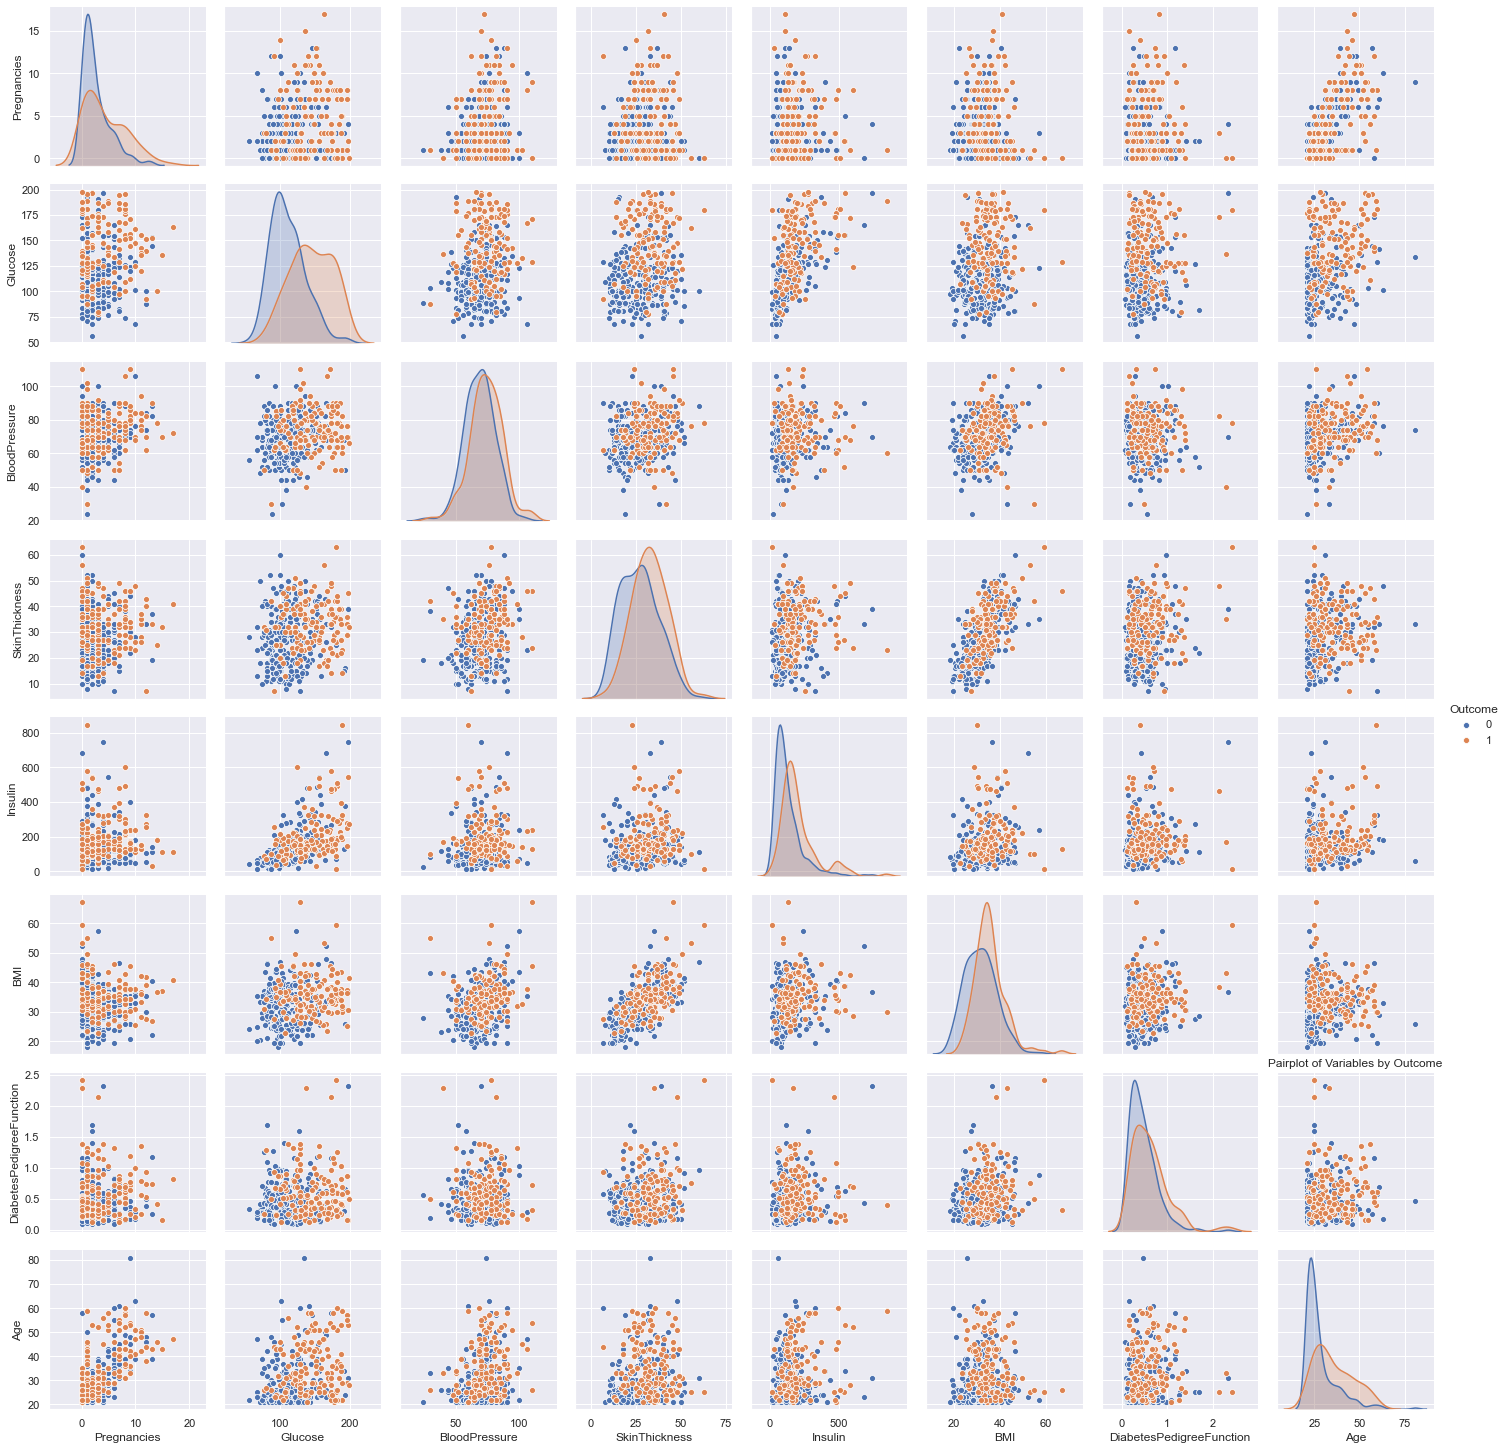

In [210]:
sns.pairplot(data, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome") 

## Inference of Pregnancies, Insulin, Diabetes Pedigree Function and Age on Outocme

Text(0.5, 1.0, 'Age by Outcome')

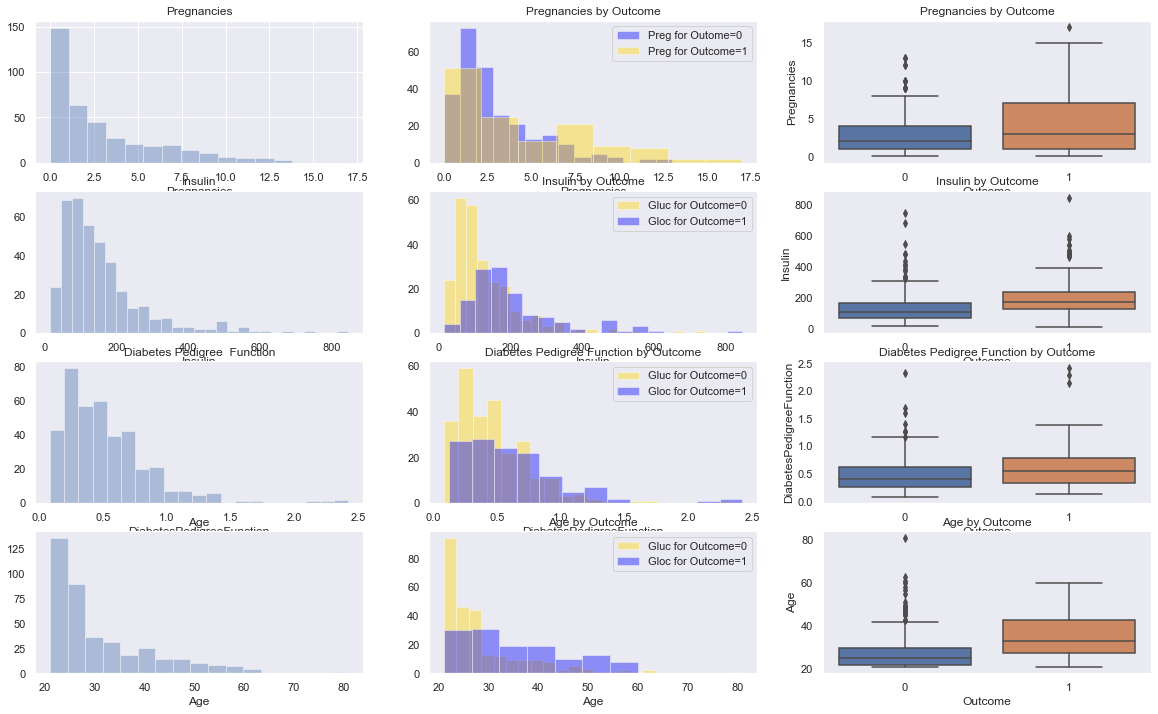

In [211]:
plt.figure(figsize=(20, 12))

plt.subplot(4,3,1)
sns.set_style("dark")
plt.title("Pregnancies")
sns.distplot(data.Pregnancies,kde=False)
plt.subplot(4,3,2)
sns.distplot(data[data.Outcome==0].Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(data[data.Outcome==1].Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Pregnancies by Outcome")
plt.legend()
plt.subplot(4,3,3)
sns.boxplot(x=data.Outcome,y=data.Pregnancies)
plt.title("Pregnancies by Outcome")

plt.subplot(4,3,4)
plt.title("Insulin")
sns.distplot(data.Insulin, kde=False)
plt.subplot(4,3,5)
sns.distplot(data[data.Outcome==0].Insulin,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(data[data.Outcome==1].Insulin, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Insulin by Outcome")
plt.legend()
plt.subplot(4,3,6)
sns.boxplot(x=data.Outcome,y=data.Insulin)
plt.title("Insulin by Outcome")

plt.subplot(4,3,7)
plt.title("Diabetes Pedigree  Function")
sns.distplot(data.DiabetesPedigreeFunction, kde=False)
plt.subplot(4,3,8)
sns.distplot(data[data.Outcome==0].DiabetesPedigreeFunction,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(data[data.Outcome==1].DiabetesPedigreeFunction, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Diabetes Pedigree Function by Outcome")
plt.legend()
plt.subplot(4,3,9)
sns.boxplot(x=data.Outcome,y=data.DiabetesPedigreeFunction)
plt.title("Diabetes Pedigree Function by Outcome")

plt.subplot(4,3,10)
plt.title("Age")
sns.distplot(data.Age, kde=False)
plt.subplot(4,3,11)
sns.distplot(data[data.Outcome==0].Age,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(data[data.Outcome==1].Age, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Age by Outcome")
plt.legend()
plt.subplot(4,3,12) 
sns.boxplot(x=data.Outcome,y=data.Age)
plt.title("Age by Outcome")

In [212]:
data_raw = pd.read_csv('diabetes.csv')
data = cleaning_data(data_raw,'Outcome','Pregnancies')
qP = data.Pregnancies.quantile(0.99)


## To get rid of outliers, we apply quantile

In [213]:
qP = data.Pregnancies.quantile(0.99)
qI = data.Insulin.quantile(0.99)
qD = data.DiabetesPedigreeFunction.quantile(0.99)
qA = data.Age.quantile(0.99)

data = data[ data.Pregnancies < qP ]
data = data[ data.Insulin < qI ]
data = data[ data.DiabetesPedigreeFunction < qD ]
data = data[ data.Age < qA ]

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

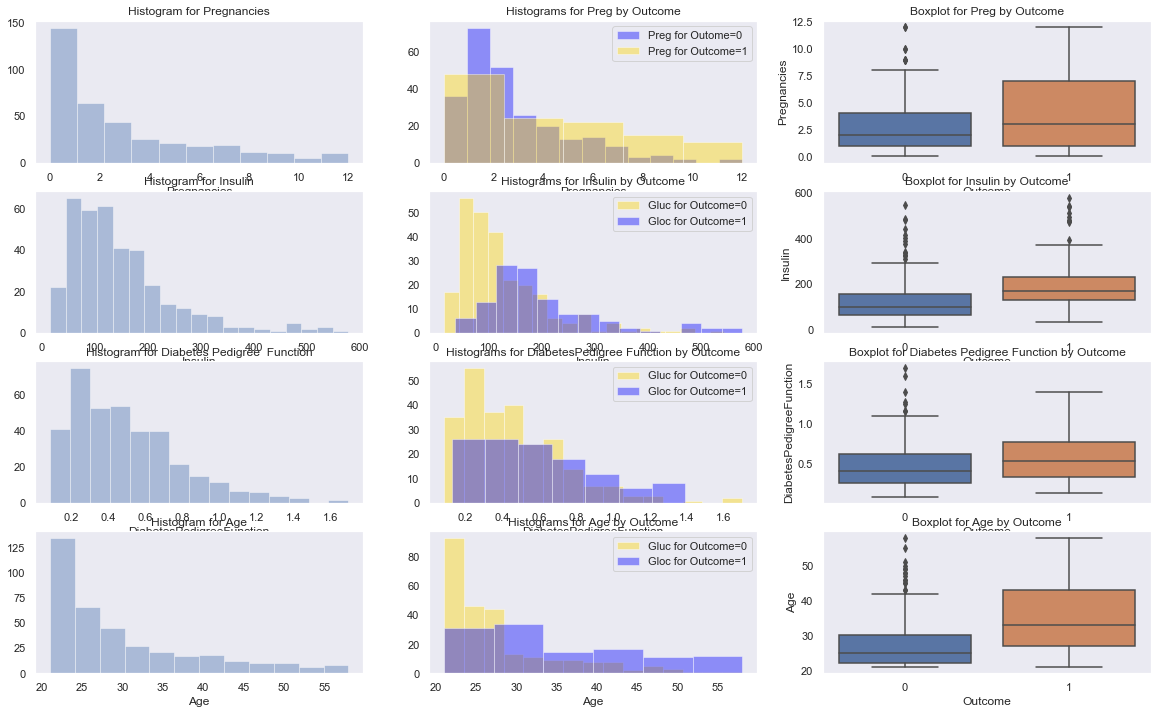

In [214]:
plt.figure(figsize=(20, 12))

plt.subplot(4,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(data.Pregnancies,kde=False)
plt.subplot(4,3,2)
sns.distplot(data[data.Outcome==0].Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(data[data.Outcome==1].Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(4,3,3)
sns.boxplot(x=data.Outcome,y=data.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

plt.subplot(4,3,4)
plt.title("Histogram for Insulin")
sns.distplot(data.Insulin, kde=False)
plt.subplot(4,3,5)
sns.distplot(data[data.Outcome==0].Insulin,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(data[data.Outcome==1].Insulin, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Insulin by Outcome")
plt.legend()
plt.subplot(4,3,6)
sns.boxplot(x=data.Outcome,y=data.Insulin)
plt.title("Boxplot for Insulin by Outcome")

plt.subplot(4,3,7)
plt.title("Histogram for Diabetes Pedigree  Function")
sns.distplot(data.DiabetesPedigreeFunction, kde=False)
plt.subplot(4,3,8)
sns.distplot(data[data.Outcome==0].DiabetesPedigreeFunction,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(data[data.Outcome==1].DiabetesPedigreeFunction, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for DiabetesPedigree Function by Outcome")
plt.legend()
plt.subplot(4,3,9)
sns.boxplot(x=data.Outcome,y=data.DiabetesPedigreeFunction)
plt.title("Boxplot for Diabetes Pedigree Function by Outcome")

plt.subplot(4,3,10)
plt.title("Histogram for Age")
sns.distplot(data.Age, kde=False)
plt.subplot(4,3,11)
sns.distplot(data[data.Outcome==0].Age,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(data[data.Outcome==1].Age, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Age by Outcome")
plt.legend()
plt.subplot(4,3,12) 
sns.boxplot(x=data.Outcome,y=data.Age)
plt.title("Boxplot for Age by Outcome")

## To find out which feature is more likely to affect on outcome, I apply heatmap

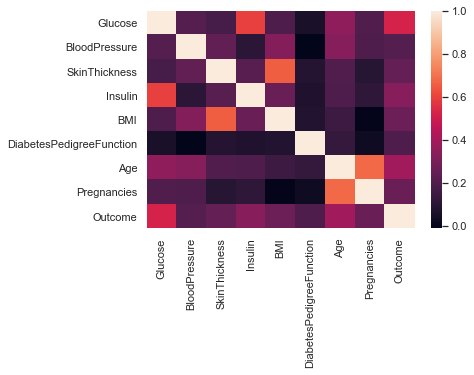

In [215]:
data_pearson = data.corr(method ='pearson') 
sns.heatmap(data_pearson)  
# It seems, glucose, insulin, BMI Age, and pregnancies are most affective ones. It is so nice to see that because in other dataset, glucose and BMI axist as common features. 

## Determining Type I Diabetes
According to Mayoclinic website, if someone who has 126  mg/dL glucose, they shuold have Type I diabetes. In this regard, there is new column is added to our dataframe for further investigation. 

Source: https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451#:~:text=A%20fasting%20blood%20sugar%20level%20from%20100%20to%20125%20mg,separate%20tests%2C%20you%20have%20diabetes.

In [216]:
data['Glucose'] 
data[ data['Glucose']>=126 ]
data[ data['Glucose']<126 ]
data_diabetes_I = data[data['Glucose']>=126].copy()

data_diabetes_I['Type of Diabetes'] = np.ones(len(data_diabetes_I))
data_diabetes_I.head

data_non_diabetes_I = data[data['Glucose']<126].copy()
data_non_diabetes_I['Type of Diabetes'] = np.zeros(len(data) - len(data_diabetes_I))
data_non_diabetes_I.head 

frames= [data_diabetes_I,data_non_diabetes_I ]
data_final = pd.concat(frames)
data_final

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome,Type of Diabetes
8,197,70,45,543,30.5,0.158,53,2,1,1.0
14,166,72,19,175,25.8,0.587,51,5,1,1.0
20,126,88,41,235,39.3,0.704,27,3,0,1.0
24,143,94,33,146,36.6,0.254,51,11,1,1.0
31,158,76,36,245,31.6,0.851,28,3,1,1.0
...,...,...,...,...,...,...,...,...,...,...
745,100,84,33,105,30.0,0.488,46,12,0,0.0
747,81,74,41,57,46.3,1.096,32,1,0,0.0
751,121,78,39,74,39.0,0.261,28,1,0,0.0
760,88,58,26,16,28.4,0.766,22,2,0,0.0


## Shuffling

In [217]:
data_final = data_final.sample(len(data_final)) 

## Three Methods is going to be applied: 
* Linear Regression

* Logistic regression,

* Support vector machine,
 
* Decision Trees 

## Linear Regression

In [218]:
x = data[data_final.columns[:-2]]
y = data['Outcome'] 

### Standard Scaling

In [219]:
from sklearn.preprocessing import StandardScaler

### Train Test Splitting

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [222]:
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.2, random_state=365)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((299, 8), (75, 8), (299,), (75,))

In [223]:
Linear_Regression = LinearRegression() 

Linear_Regression.fit(train_x, train_y)  

Linear_Regression_Accuracy = Linear_Regression.score(test_x, test_y) 

Linear_Regression_Accuracy
# It is meaningless to have confussion matrix. 

0.3186051027973774

## Linear regression with Ridge Classifier

In [224]:
from sklearn.linear_model import RidgeClassifier

Linear_Ridge = RidgeClassifier()

Linear_Ridge.fit(train_x, train_y)

Linear_Ridge_Accuracy = Linear_Ridge.score(test_x, test_y)

y_pred = Linear_Ridge.predict(test_x)
Linear_Ridge_confussion_matrix = confusion_matrix(test_y, y_pred)
Linear_Ridge_Accuracy

0.7466666666666667

## Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
## Importing stats models for running logistic regression
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,x)
## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.556687
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  374
Model:                          Logit   Df Residuals:                      366
Method:                           MLE   Df Model:                            7
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.1129
Time:                        13:23:13   Log-Likelihood:                -208.20
converged:                       True   LL-Null:                       -234.69
Covariance Type:            nonrobust   LLR p-value:                 3.745e-09
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Glucose                      0.0161      0.005      3.294      0.001       0.007

In [227]:
x.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies'],
      dtype='object')

## To Learn Which Columns Are Best By Working Logistic Regreesion

In [228]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [229]:
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y, test_size=0.2, random_state=365)


In [230]:
Logistic_Lasso = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=0).fit(train_x, train_y)

y_pred = Logistic_Lasso.predict(test_x)
Logistic_Lasso_confussion_matrix = confusion_matrix(test_y, y_pred)

Logistic_Lasso_Accuracy = Logistic_Lasso.score(test_x, test_y) 
Logistic_Lasso_Accuracy

0.7466666666666667

In [231]:
Logistic_Ridge = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=0).fit(train_x, train_y)

y_pred = Logistic_Ridge.predict(test_x)
Logistic_Ridge_confussion_matrix = confusion_matrix(test_y, y_pred)

Logistic_Ridge_Accuracy = Logistic_Ridge.score(test_x, test_y)  
Logistic_Ridge_Accuracy

0.7466666666666667

## Support Vector Machine

In [232]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [233]:
SGD_SVM_Pima = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
SGD_SVM_Pima.fit(train_x, train_y)

y_pred = SGD_SVM_Pima.predict(test_x)

SGD_SVM_Pima_confussion_matrix = confusion_matrix(test_y, y_pred)

SGD_SVM_Pima_Accuracy = Logistic_Ridge.score(test_x, test_y)  
SGD_SVM_Pima_Accuracy


0.7466666666666667

## Decision Tree

In [234]:
from sklearn.tree import DecisionTreeClassifier 

As we already preprocessed data:

In [235]:
x = data[data_final.columns[:-2]]
y = data['Outcome'] 
#
scaler = StandardScaler()
X = scaler.fit_transform(x)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=365)

Pima_DTC = DecisionTreeClassifier()
Pima_DTC = Pima_DTC.fit(train_x, train_y)

Pima_DTC.feature_importances_  

array([0.31220082, 0.04295835, 0.03110446, 0.10828649, 0.15556963,
       0.09965584, 0.20824213, 0.04198228])

Building Model & Accuracy

In [236]:
y_pred = Pima_DTC.predict(test_x)

# Checking confusion metrics
DT_confussion_matrix = confusion_matrix(test_y, y_pred)
# Checking accuracy
DT_Accuracy = metrics.accuracy_score(test_y,y_pred)
print("Accuracy:", DT_Accuracy )

Accuracy: 0.6666666666666666


Random Forest

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
x = data[data_final.columns[:-2]]
y = data['Outcome'] 
#
scaler = StandardScaler()
X = scaler.fit_transform(x)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=365)

In [239]:
Random_Forest_Pima = RandomForestClassifier(n_estimators=100, random_state=1956)  
Random_Forest_Pima.fit(train_x, train_y)  

y_pred = Random_Forest_Pima.predict(test_x)

#Checking confusion metrics
RF_confussion_matrix = metrics.confusion_matrix(test_y, y_pred)
print('confusion metrics :\n', DT_confussion_matrix)
# Checking accuracy
RF_Accuracy = metrics.accuracy_score(test_y,y_pred)
print('Accuracy Score:', RF_Accuracy)


confusion metrics :
 [[32 14]
 [11 18]]
Accuracy Score: 0.7866666666666666


Source: https://www.kaggle.com/praveshku/pima-india-diabetes-random-forest

In [240]:
import pandas as pd

In [241]:
def conf_matrix(target_confussion_matrix):
    c = np.array(target_confussion_matrix).flatten()
    false_positive=[]
    false_negative=[]
    true_negative=[]
    true_positive=[]
    for i,j,k,n in zip(c[::1],c[::2],c[::3],c[::4]):
        true_positive.append(i)
        true_negative.append(j)
        false_positive.append(k)
        false_negative.append(n)
    return [true_positive,true_negative,false_positive,false_negative]

Accuracies = [Linear_Ridge_Accuracy, Logistic_Lasso_Accuracy, Logistic_Ridge_Accuracy, SGD_SVM_Pima_Accuracy, DT_Accuracy,RF_Accuracy]
Confussion = [Linear_Ridge_confussion_matrix,Logistic_Lasso_confussion_matrix,Logistic_Ridge_confussion_matrix,SGD_SVM_Pima_confussion_matrix,DT_confussion_matrix,RF_confussion_matrix]
names = ['Linear_Ridge', 'Logistic_Lasso', 'Logistic_Ridge', 'SGD_SVM', 'DT_Accuracy','RF_Accuracy']

Dataframe_Overall_PIMA = { 'Accuracies':   pd.Series(Accuracies, index = names),
'True Positive': pd.Series(conf_matrix(Confussion)[0],  index = names),
'True Negative': pd.Series(conf_matrix(Confussion)[1],  index = names),
'False Positive': pd.Series(conf_matrix(Confussion)[2],   index = names),
'False Negative': pd.Series(conf_matrix(Confussion)[3],   index = names)
}
General_Evaluation_PIMA = pd.DataFrame(Dataframe_Overall_PIMA) 
General_Evaluation_PIMA       

,Accuracies,True Positive,True Negative,False Positive,False Negative
Linear_Ridge,0.746667,40,40,40,40
Logistic_Lasso,0.746667,6,13,16,40
Logistic_Ridge,0.746667,13,40,13,40
SGD_SVM,0.746667,16,13,6,39
DT_Accuracy,0.666667,40,40,39,32
RF_Accuracy,0.786667,6,13,18,42


# Chinese Dataset

In [242]:
# We have to load data our model has never seen before.
Chinese_Dataset = pd.read_excel('Chinese_Dataset.xlsx',  index_col=0)

In [243]:
Chinese_Dataset.head()

,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),...,AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
id,,,,,,,,,,,,,,,,,,,,,
1,43,2,16,166.4,53.5,19.3,96.0,57.0,4.99,5.13,...,NaN,3.08,50.3,4.97,NaN,0,2.151951,3.0,3.0,1
2,34,1,2,169.0,57.0,20.0,124.0,69.0,3.51,4.61,...,NaN,6.13,83.7,5.50,NaN,0,3.969884,NaN,NaN,0
3,32,2,2,157.0,51.0,20.7,98.0,68.0,4.25,4.73,...,19.5,4.45,42.8,4.90,NaN,0,3.939767,NaN,NaN,0
11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,4.50,...,NaN,5.76,62.6,5.50,NaN,0,2.184805,3.0,3.0,0
14,30,2,9,163.5,48.5,18.1,107.0,76.0,4.42,3.48,...,19.9,2.51,48.9,4.82,NaN,0,2.026010,NaN,NaN,0


# Creating Diabetes Column To Start

Data consists of various information to diagnose diabetes. We are going to sum three columns in the dataset and sum them in new column.
* New column is going to be for describing whether people are diagnosed as Diabetes or not.
* There are three identfying columns: `FPG level`, `Diabetes diagnosed during followup` and `censor of diabetes at followup(1, Yes; 0, No)`. 
Note: If someone is diagnosed in one of them, new column is going to be defined in respect to that information because diagnosis has been done in respect to whether people decleared itself or from FPG levels. (There are people even have no high FPG levels, still having diabetes. In this reason, declearing is also imporant.) 
* Paper used 7.0 mmol/L for diagnosis as we have used in previous dataset. 

In [244]:
Chinese_DataseT = Chinese_Dataset.copy()

In [245]:
CD_FPG = Chinese_DataseT[Chinese_DataseT['FPG (mmol/L)'] > 6.99] 
CD_DDD = Chinese_DataseT[Chinese_DataseT[f'{Chinese_DataseT.columns[-6]}'] == 1 ] # Chinese_DataseT.columns[-6] == 'Diabetes diagnosed during followup（1,Yes）'
CD_CDD = Chinese_DataseT[Chinese_DataseT['censor of diabetes at followup(1, Yes; 0, No)'] == 1] 

CD_Diabetes = pd.merge(
    CD_FPG,
    CD_DDD,
    how="outer",
    on= ['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'FPG of final visit(mmol/L)',
       'Diabetes diagnosed during followup（1,Yes）', 'year of followup',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)',
       'censor of diabetes at followup(1, Yes; 0, No)'],
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
) 
CD_Total_Diabetes = pd.merge(
    CD_Diabetes,
    CD_CDD,
    how="outer",
    on= ['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'FPG of final visit(mmol/L)',
       'Diabetes diagnosed during followup（1,Yes）', 'year of followup',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)',
       'censor of diabetes at followup(1, Yes; 0, No)'],
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
) 
len(CD_Total_Diabetes)

4174

In [246]:
CD_Total_Diabetes['Diabetes'] = np.ones(len(CD_Total_Diabetes))  
type(CD_Total_Diabetes ) 
#CD_Total_Diabetes.loc[:,1] 

pandas.core.frame.DataFrame

When we add our CD_Total Diabetes which consists of Diabetes positive rows, there will be issue about how we define NaN values of Diabetes.

And as it can be seen, there are huge amount of data which shows zeros for Diabetes.

In [247]:
len(Chinese_DataseT[ Chinese_DataseT[ 'censor of diabetes at followup(1, Yes; 0, No)' ] == 0 ] ), len(Chinese_DataseT),

len(CD_Total_Diabetes), len(CD_Total_Diabetes.drop_duplicates(subset=CD_Total_Diabetes.columns, keep='last'))


(4174, 4174)

For this reason, we also create a section in which Diabetes is negative in respet to cencored information. 

Converting NaN values to 0 in Diabetes column thanks to cencored information. 

In [248]:
CD_CDD_zeros = Chinese_DataseT[Chinese_DataseT['censor of diabetes at followup(1, Yes; 0, No)'] == 0 ] 
zeros = np.zeros(len(CD_CDD_zeros))
CD_CDD_zeros.loc[:, ('Diabetes')] = np.zeros(len(CD_CDD_zeros))
CD_CDD_zeros_Z = CD_CDD_zeros.copy()


C:\Users\Asus\anaconda32\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Asus\anaconda32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [249]:
CD_Total_Diabetes_Zeros_Ones = pd.merge( 
    CD_Total_Diabetes,
    CD_CDD_zeros_Z,
    how="outer",
    on= ['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'FPG of final visit(mmol/L)',
       'Diabetes diagnosed during followup（1,Yes）', 'year of followup',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)',
       'censor of diabetes at followup(1, Yes; 0, No)','Diabetes'],
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
) 
CD_Total_Diabetes_Zeros_Ones.head(), 
len(CD_Total_Diabetes_Zeros_Ones) == len(CD_Total_Diabetes) + len(CD_CDD_zeros_Z) 


True

    Checking whether main Chinese Dataset have same amount of information in compare to our new dataset which includes `Diabetes`

In [250]:
CDT = CD_Total_Diabetes_Zeros_Ones.drop_duplicates(subset=CD_Total_Diabetes_Zeros_Ones.columns[:-1],keep='last') 

print('Number of parameters in New dataset:', len(CD_Total_Diabetes_Zeros_Ones)) 
print('Number of parameters in main dataset:',  len(Chinese_Dataset)) 
print('Total number of people who have diabetes', CD_Total_Diabetes_Zeros_Ones['Diabetes'].sum()) 
print('Final', len(CDT)) 

Number of parameters in New dataset: 211833
Number of parameters in main dataset: 211833
Total number of people who have diabetes 4174.0
Final 211833


In [251]:
print(CDT.columns)
CDT.head()

Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'FPG of final visit(mmol/L)',
       'Diabetes diagnosed during followup（1,Yes）',
       'censor of diabetes at followup(1, Yes; 0, No)', 'year of followup',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object')


,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),...,BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)",Diabetes
0,20,1,2,165.0,74.0,27.2,106.0,65.0,3.65,4.55,...,7.04,75.1,4.01,NaN,0,2.934976,NaN,NaN,0,0.0
1,20,1,3,172.5,65.0,21.8,121.0,75.0,4.67,3.89,...,2.86,74.5,5.00,NaN,0,2.028747,1.0,3.0,0,0.0
2,20,1,3,174.0,72.0,23.8,120.0,73.0,5.36,3.85,...,2.97,65.0,4.53,NaN,0,2.099932,1.0,3.0,0,0.0
3,20,1,5,179.0,93.0,29.0,108.0,68.0,4.50,4.55,...,NaN,NaN,5.30,NaN,0,4.402464,NaN,NaN,0,0.0
4,20,1,8,161.0,67.5,26.0,118.0,71.0,6.10,3.54,...,5.30,68.3,5.55,NaN,0,2.105407,NaN,NaN,0,0.0


As we added diabetes column, properly, now we can get rid of columns we do not need anymore: 

In [252]:
Columns_We_Do_Not_Need_Anymore = ['Diabetes diagnosed during followup（1,Yes）','censor of diabetes at followup(1, Yes; 0, No)'] 
CDT_Dropped = CDT.drop(Columns_We_Do_Not_Need_Anymore , axis =1) 
CDT_Dropped.head() 

,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),...,ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)",Diabetes
0,20,1,2,165.0,74.0,27.2,106.0,65.0,3.65,4.55,...,40.7,115.9,7.04,75.1,4.01,2.934976,NaN,NaN,0,0.0
1,20,1,3,172.5,65.0,21.8,121.0,75.0,4.67,3.89,...,12.0,17.5,2.86,74.5,5.00,2.028747,1.0,3.0,0,0.0
2,20,1,3,174.0,72.0,23.8,120.0,73.0,5.36,3.85,...,26.0,26.0,2.97,65.0,4.53,2.099932,1.0,3.0,0,0.0
3,20,1,5,179.0,93.0,29.0,108.0,68.0,4.50,4.55,...,45.0,NaN,NaN,NaN,5.30,4.402464,NaN,NaN,0,0.0
4,20,1,8,161.0,67.5,26.0,118.0,71.0,6.10,3.54,...,10.3,NaN,5.30,68.3,5.55,2.105407,NaN,NaN,0,0.0


Calculating NaNs

In [253]:
CDT_Dropped.isna().sum() , len(CDT_Dropped), len(CDT_Dropped[CDT_Dropped['Diabetes']==1])

(Age (y)                                                                    0
 Gender(1, male; 2, female)                                                 0
 site                                                                       0
 height(cm)                                                                 2
 weight(kg)                                                                 0
 BMI(kg/m2)                                                                 0
 SBP(mmHg)                                                                 23
 DBP(mmHg)                                                                 24
 FPG (mmol/L)                                                               0
 Cholesterol(mmol/L)                                                     4854
 Triglyceride(mmol/L)                                                    4887
 HDL-c(mmol/L)                                                          94562
 LDL(mmol/L)                                                    

As we can see, smoking, drinking and AST values having so much NaN values. Let`s look at heatmap to estimate how much they affect our outcome, diabetes.

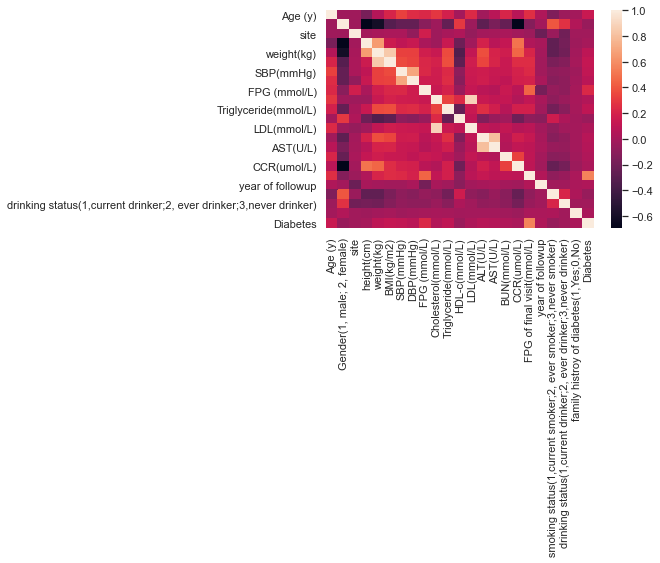

In [254]:
data_pearson = CDT_Dropped.corr(method ='pearson') 
sns.heatmap(data_pearson)  

After heatmap and null numbers investigation, I decided to exclude smoking, drinking and AST values. 

It is also important to remind that FPG final and year of follow up have nothing to do for our prediction, so I will exclude them as well.

In [255]:
CDT_Dropped.columns

Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'AST(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'FPG of final visit(mmol/L)', 'year of followup',
       'smoking status(1,current smoker;2, ever smoker;3,never smoker)',
       'drinking status(1,current drinker;2, ever drinker;3,never drinker)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object')

In [256]:
Columns_We_Do_Not_Need_1 = ['FPG of final visit(mmol/L)','year of followup']
Columns_We_Do_Not_Need_2 = ['AST(U/L)','drinking status(1,current drinker;2, ever drinker;3,never drinker)','smoking status(1,current smoker;2, ever smoker;3,never smoker)'] 

CDT_Dropped_1 = CDT_Dropped.drop(Columns_We_Do_Not_Need_1 , axis =1) 
CDT_Dropped_2 = CDT_Dropped_1.drop(Columns_We_Do_Not_Need_2 , axis =1) 


Let`s check our data:

In [257]:
CDT_Dropped_2.isna().sum() , len(CDT_Dropped), len(CDT_Dropped_2[CDT_Dropped_2['Diabetes']==1])

(Age (y)                                       0
 Gender(1, male; 2, female)                    0
 site                                          0
 height(cm)                                    2
 weight(kg)                                    0
 BMI(kg/m2)                                    0
 SBP(mmHg)                                    23
 DBP(mmHg)                                    24
 FPG (mmol/L)                                  0
 Cholesterol(mmol/L)                        4854
 Triglyceride(mmol/L)                       4887
 HDL-c(mmol/L)                             94562
 LDL(mmol/L)                               93421
 ALT(U/L)                                   1782
 BUN(mmol/L)                               21551
 CCR(umol/L)                               11175
 family histroy of diabetes(1,Yes;0,No)        0
 Diabetes                                      0
 dtype: int64,
 211833,
 4174)

It seems much better, so we can exclude NaN values now. 

In [258]:
CDT_Dropped_3 = CDT_Dropped_2.dropna()

In [259]:
CDT_Dropped_3.isna().sum() , len(CDT_Dropped), len(CDT_Dropped_3[CDT_Dropped_3['Diabetes']==1]) 

(Age (y)                                   0
 Gender(1, male; 2, female)                0
 site                                      0
 height(cm)                                0
 weight(kg)                                0
 BMI(kg/m2)                                0
 SBP(mmHg)                                 0
 DBP(mmHg)                                 0
 FPG (mmol/L)                              0
 Cholesterol(mmol/L)                       0
 Triglyceride(mmol/L)                      0
 HDL-c(mmol/L)                             0
 LDL(mmol/L)                               0
 ALT(U/L)                                  0
 BUN(mmol/L)                               0
 CCR(umol/L)                               0
 family histroy of diabetes(1,Yes;0,No)    0
 Diabetes                                  0
 dtype: int64,
 211833,
 2601)

We have lost our half of our diabetes positive rows, but we still have much data compare to previous study. 

# End of first part of Preprocessing I

# Preprocessing II (Quantiles)

## Protocol

In this part, we are going to plot data and apply quantiles to get more accurate results

In [260]:
Chinese_DataseT_Cleaned_Dropped = CDT_Dropped_3

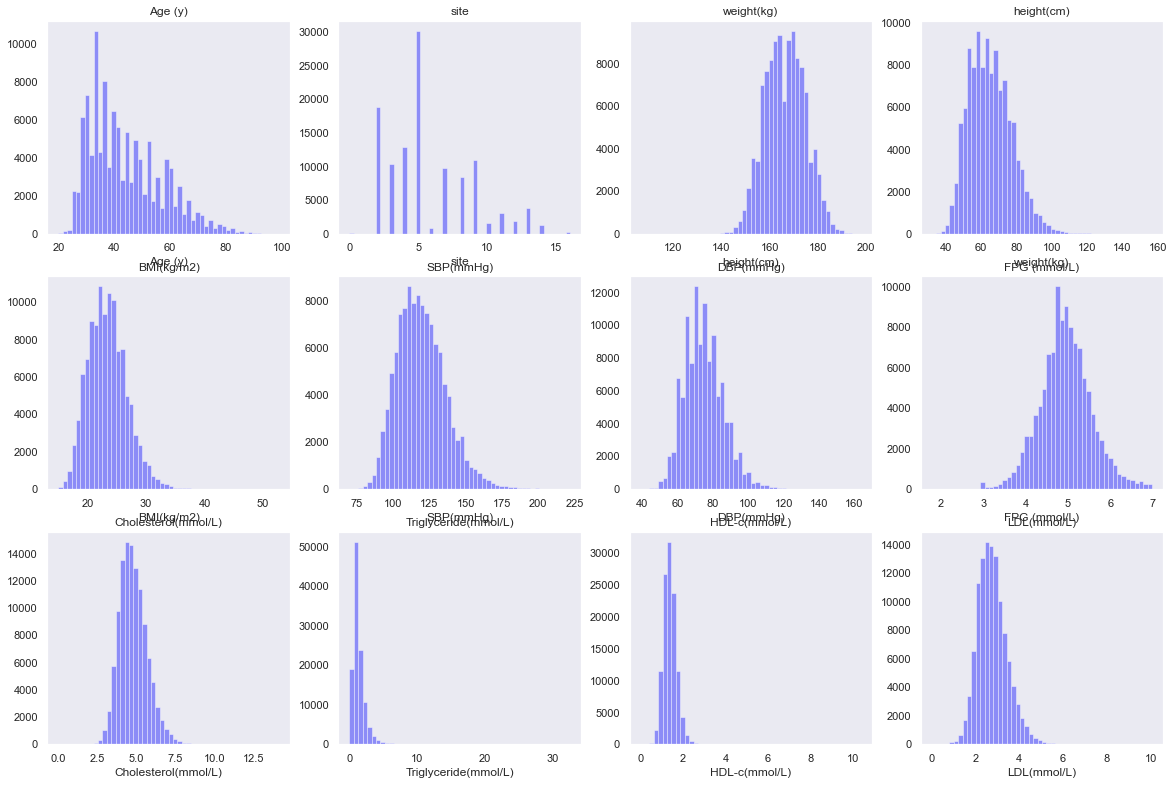

In [261]:
plt.figure(figsize=(20, 18)) 
#Outcome_Diabetes = Chinese_DataseT_Cleaned_Dropped['censor of diabetes at followup(1, Yes; 0, No)'] 

Outcome_Age = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[0]}']
Outcome_Gender = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[1]}']
Outcome_Site = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[2]}']
Outcome_Height = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[3]}']
Outcome_Weight = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[4]}']
Outcome_BMI = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[5]}']
Outcome_SBP = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[6]}']
Outcome_DBP = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[7]}']
Outcome_FPG = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[8]}']
Outcome_Cholesterol = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[9]}']
Outcome_Triglyceride = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[10]}']
Outcome_HDL = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[11]}']
Outcome_LDL = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[12]}']

# Gender is two sided, so I will not be plotted. 
plt.subplot(4,4,1) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[0]}')
sns.distplot(Outcome_Age,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[0]}') 

plt.subplot(4,4,2) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[2]}') 
sns.distplot(Outcome_Site,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[2]}') 

plt.subplot(4,4,3) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[4]}') 
sns.distplot(Outcome_Height,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[3]}') 

plt.subplot(4,4,4) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[3]}') 
sns.distplot(Outcome_Weight,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[4]}') 

plt.subplot(4,4,5) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[5]}') 
sns.distplot(Outcome_BMI,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[5]}') 

plt.subplot(4,4,6) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[6]}')
sns.distplot(Outcome_SBP,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[6]}') 

plt.subplot(4,4,7) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[7]}')
sns.distplot(Outcome_DBP,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[7]}') 

plt.subplot(4,4,8) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[8]}')
sns.distplot(Outcome_FPG,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[8]}') 

plt.subplot(4,4,9) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[9]}')
sns.distplot(Outcome_Cholesterol,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[9]}') 

plt.subplot(4,4,10) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[10]}')
sns.distplot(Outcome_Triglyceride,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[10]}') 

plt.subplot(4,4,11) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[11]}')
sns.distplot(Outcome_HDL,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[11]}') 

plt.subplot(4,4,12) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_Cleaned_Dropped.columns[12]}')
sns.distplot(Outcome_LDL,kde=False,color="Blue", label=f'{Chinese_DataseT_Cleaned_Dropped.columns[12]}') 


In [262]:
Chinese_DataseT_Cleaned_Dropped.columns

Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object')

In [263]:
Chinese_DataseT_After_Quantiled = Chinese_DataseT_Cleaned_Dropped.copy() 

ql_Outcome_Age = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[0]}'].quantile(0.99) # 0 
qb_Outcome_Age = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[0]}'].quantile(0.001) # 0 
q_Outcome_Site = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[2]}'].quantile(0.99) # 0  # 2
#q_Outcome_Gender = Outcome_Gender # 1 We do not need to modify this. 
ql_Outcome_Height = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[3]}'].quantile(0.96) # 0  # 3
qb_Outcome_Height = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[3]}'].quantile(0.001) # 3
q_Outcome_Weight = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[4]}'].quantile(0.90) # 0  # 4
q_Outcome_BMI = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[5]}'].quantile(0.99) # 0  # 5
q_Outcome_SBP = Chinese_DataseT_Cleaned_Dropped[f'{Chinese_DataseT_Cleaned_Dropped.columns[6]}'].quantile(0.99) # 6
q_Outcome_DBP = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[7]}'].quantile(0.95) # 0  # 6
q_Outcome_FPG = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[8]}'].quantile(0.05) # 0  # 7
ql_Outcome_Cholesterol = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[9]}'].quantile(0.99) # 0  # 8
qb_Outcome_Cholesterol = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[9]}'].quantile(0.02) # 0  # 8
q_Outcome_Triglyceride = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[10]}'].quantile(0.95) # 0  # 9
ql_Outcome_HDL = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[11]}'].quantile(0.95)
qb_Outcome_HDL = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[11]}'].quantile(0.01) # 0  # 10
ql_Outcome_LDL = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[12]}'].quantile(0.95) # 0  # 11
qb_Outcome_LDL = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[12]}'].quantile(0.01) # 0  # 11

Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[0]}'] <= ql_Outcome_Age] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[0]}'] >= qb_Outcome_Age] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[2]}'] <= q_Outcome_Site] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[3]}'] <= ql_Outcome_Height] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[3]}'] >= qb_Outcome_Height] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[4]}'] <= q_Outcome_Weight] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[5]}'] <= q_Outcome_BMI] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[6]}'] <= q_Outcome_SBP] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[7]}'] <= q_Outcome_DBP] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[8]}'] >= q_Outcome_FPG] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[9]}'] <= ql_Outcome_Cholesterol] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[9]}'] >= qb_Outcome_Cholesterol] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[10]}'] <= q_Outcome_Triglyceride] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[11]}'] <= ql_Outcome_HDL] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[11]}'] >= qb_Outcome_HDL] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[12]}'] <= ql_Outcome_LDL] 
Chinese_DataseT_After_Quantiled = Chinese_DataseT_After_Quantiled[Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[12]}'] >= qb_Outcome_LDL] 

In [264]:
len(Chinese_DataseT_After_Quantiled)

76294

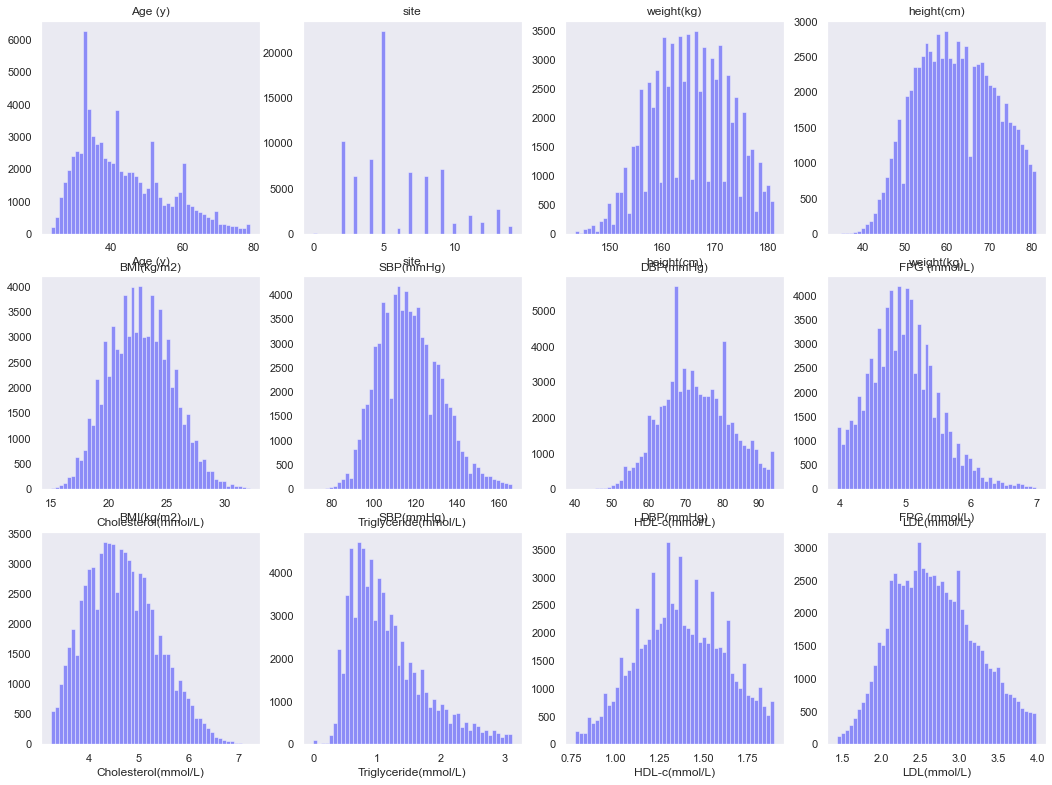

In [265]:
plt.figure(figsize=(18, 18)) 

Outcome_Age = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[0]}']
Outcome_Age = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[0]}']
Outcome_Gender = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[1]}']
Outcome_Site = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[2]}']
Outcome_Height = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[3]}']
Outcome_Weight = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[4]}']
Outcome_BMI = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[5]}']
Outcome_SBP = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[6]}']
Outcome_DBP = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[7]}']
Outcome_FPG = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[8]}']
Outcome_Cholesterol = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[9]}']
Outcome_Triglyceride = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[10]}']
Outcome_HDL = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[11]}']
Outcome_LDL = Chinese_DataseT_After_Quantiled[f'{Chinese_DataseT_After_Quantiled.columns[12]}']

# Gender is two sided, so I will not be plotted. 
plt.subplot(4,4,1) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[0]}')
sns.distplot(Outcome_Age,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[0]}') 

plt.subplot(4,4,2) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[2]}') 
sns.distplot(Outcome_Site,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[2]}') 

plt.subplot(4,4,3) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[4]}') 
sns.distplot(Outcome_Height,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[3]}') 

plt.subplot(4,4,4) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[3]}') 
sns.distplot(Outcome_Weight,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[4]}') 

plt.subplot(4,4,5) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[5]}') 
sns.distplot(Outcome_BMI,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[5]}') 

plt.subplot(4,4,6) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[6]}')
sns.distplot(Outcome_SBP,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[6]}') 

plt.subplot(4,4,7) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[7]}')
sns.distplot(Outcome_DBP,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[7]}') 

plt.subplot(4,4,8) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[8]}')
sns.distplot(Outcome_FPG,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[8]}') 

plt.subplot(4,4,9) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[9]}')
sns.distplot(Outcome_Cholesterol,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[9]}') 

plt.subplot(4,4,10) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[10]}')
sns.distplot(Outcome_Triglyceride,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[10]}') 

plt.subplot(4,4,11) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[11]}')
sns.distplot(Outcome_HDL,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[11]}') 

plt.subplot(4,4,12) 
sns.set_style("dark") 
plt.title(f'{Chinese_DataseT_After_Quantiled.columns[12]}')
sns.distplot(Outcome_LDL,kde=False,color="Blue", label=f'{Chinese_DataseT_After_Quantiled.columns[12]}') 

In [266]:
QAD_Database = Chinese_DataseT_After_Quantiled
print(QAD_Database.columns,'len:',len(QAD_Database.columns))
QAD_Database.head()

Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object') len: 18


,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),BUN(mmol/L),CCR(umol/L),"family histroy of diabetes(1,Yes;0,No)",Diabetes
237,23,1,2,167.0,71.0,25.5,100.0,53.0,4.75,3.84,1.07,0.93,2.45,26.8,4.21,75.2,0,0.0
241,23,1,2,171.0,65.0,22.2,100.0,62.0,4.93,4.03,1.21,0.95,2.69,22.2,4.22,73.7,0,0.0
256,23,1,3,172.0,66.0,22.3,119.0,81.0,5.18,4.46,0.62,1.13,2.83,9.0,3.63,65.5,0,0.0
260,23,1,3,179.5,62.5,19.4,121.0,84.0,5.02,3.66,0.77,1.42,1.97,16.8,2.69,67.7,0,0.0
263,23,1,4,163.0,55.0,20.7,144.0,73.0,5.09,4.37,1.71,0.99,2.63,18.4,4.86,74.0,0,0.0


Shuffling

In [267]:
QAD_Database = QAD_Database.sample(len(QAD_Database), random_state=1956) 
len(QAD_Database), len(QAD_Database[QAD_Database['Diabetes'] ==1]) 

(76294, 1237)

In overall, we have 76294 sample which consists 1248 diabetes positive.

# I need to try somethings

In [268]:
QaD = QAD_Database.sample(n = len(QAD_Database[QAD_Database['Diabetes'] ==1])*2, random_state=1956)

In [269]:
QAD_Database.columns

Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object')

In [270]:
CDQADT = pd.merge( 
    QAD_Database[QAD_Database['Diabetes'] ==1],
    QaD,
    how="outer",
    on= ['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
) 
CDQADT_Dup = CDQADT.drop_duplicates(subset=CDQADT.columns[:-1],keep='last') 

len(CDQADT_Dup), len(CDQADT) , len(QAD_Database),  len(QaD) 

(3676, 3676, 76294, 2474)

# Try Ends

# End of Preprocessing II (Quantile)

# Tools

Techniques which are going to be used

* Linear Regression
  - Ridge

* Logistic
  - Lasso
  - Ridge

In [271]:
CDQADT_Dup.columns

Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object')

### Standardization 

In [272]:
xC = CDQADT_Dup[CDQADT_Dup.columns[:-1]] 
yC = CDQADT_Dup['Diabetes']  
xC.head()
yC.sum(), len(yC)

(1237.0, 3676)

### Scaling

In [273]:
scaler_c = StandardScaler()
scaler_c.fit(xC)
xC_scaled = scaler_c.transform(xC)
train_xC, test_xC, train_yC, test_yC = train_test_split(xC_scaled, yC, test_size=0.2, random_state=1956)
train_xC.shape, test_xC.shape, train_yC.shape, test_yC.shape

((2940, 17), (736, 17), (2940,), (736,))

In [274]:
test_xC.shape, test_yC.shape

((736, 17), (736,))

## Linear Regression
* Ridge

In [275]:
from sklearn.linear_model import RidgeClassifier
Linear_Ridge_C = RidgeClassifier()
Linear_Ridge_C.fit(train_xC, train_yC)
y_pred_C = Linear_Ridge_C.predict(test_xC)

Linear_Ridge_C_confussion_matrix = confusion_matrix(test_yC, y_pred_C) 
Linear_Ridge_C_Accuracy = Linear_Ridge_C.score(test_xC, test_yC)
Linear_Ridge_C_Accuracy 

0.8519021739130435

## Logistic Regression Summary

In [276]:
logit_model_C =sm.Logit(train_yC,train_xC)
result_C = logit_model_C.fit()
print(result_C.summary())

Optimization terminated successfully.
         Current function value: 0.409892
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                 2940
Model:                          Logit   Df Residuals:                     2923
Method:                           MLE   Df Model:                           16
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.3609
Time:                        13:24:20   Log-Likelihood:                -1205.1
converged:                       True   LL-Null:                       -1885.6
Covariance Type:            nonrobust   LLR p-value:                3.974e-280
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7398      0.065     11.328      0.000       0.612       0.868
x2            -0.0636      0.

In [277]:
QAD_Database_Modified = CDQADT_Dup.copy() 
Columns_To_Exclude = [ xC.columns[3], xC.columns[4], xC.columns[5],xC.columns[9] , xC.columns[10], xC.columns[11] ] 
for i in range(len(Columns_To_Exclude)):  
    QAD_Database_Modified = QAD_Database_Modified.drop(Columns_To_Exclude[i], axis=1) 
len(QAD_Database_Modified.columns) 

12

In [278]:
xC = QAD_Database_Modified[QAD_Database_Modified.columns[:-1]] 
yC = QAD_Database_Modified['Diabetes']  
xC.head() 
yC.sum(), len(yC) 
scaler_c = StandardScaler() 
scaler_c.fit(xC) 
xC_scaled = scaler_c.transform(xC) 
train_xC, test_xC, train_yC, test_yC = train_test_split(xC_scaled, yC, test_size=0.2, random_state=1956) 
train_xC.shape, test_xC.shape, train_yC.shape, test_yC.shape 

((2940, 11), (736, 11), (2940,), (736,))

## Logistic Regressions
* Lasso
* Ridge 

Lasso

In [279]:
Logistic_Lasso_C = LogisticRegression(C=1, penalty='l2', solver='lbfgs', random_state=0).fit(train_xC, train_yC) 

y_pred = Logistic_Lasso_C.predict(test_xC)

Logistic_Lasso_C_confussion_matrix = confusion_matrix(test_yC, y_pred_C)
Logistic_Lasso_C_Accuracy = Logistic_Lasso_C.score(test_xC, test_yC) 
Logistic_Lasso_C_Accuracy

0.8491847826086957

Ridge

In [280]:
Logistic_Ridge_C = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=0).fit(train_xC, train_yC)
y_pred_C = Logistic_Ridge_C.predict(test_xC)

Logistic_Ridge_C_confussion_matrix = confusion_matrix(test_yC, y_pred_C)
Logistic_Ridge_C_Accuracy = Logistic_Ridge_C.score(test_xC, test_yC) 
Logistic_Ridge_C_Accuracy

0.8491847826086957

SVM

In [281]:
SGD_SVM_C =  (SGDClassifier(max_iter=1000, tol=1e-3)).fit(train_xC, train_yC)
y_pred_C = SGD_SVM_C.predict(test_xC)

SGD_SVM_C_confussion_matrix = confusion_matrix(test_yC, y_pred_C)
SGD_SVM_C_Accuracy = SGD_SVM_C.score(test_xC, test_yC)  
SGD_SVM_C_Accuracy

0.8206521739130435

Decision Trees

In [282]:
China_DTC = DecisionTreeClassifier() 
China_DTC = China_DTC.fit(train_xC, train_yC)
y_pred_C = China_DTC.predict(test_xC)

China_DTC.feature_importances_  

DT_China_confussion_matrix = confusion_matrix(test_yC, y_pred_C)

DT_China_Accuracy = metrics.accuracy_score(test_yC,y_pred_C)
DT_China_Accuracy

0.7894021739130435

Random Forest

In [283]:
Random_Forest_China = RandomForestClassifier(n_estimators=100, random_state=1956)  
Random_Forest_China.fit(train_xC, train_yC)  
y_pred_C = Random_Forest_China.predict(test_xC)

RF_China_confussion_matrix = metrics.confusion_matrix(test_yC, y_pred_C)

RF_China_Accuracy = metrics.accuracy_score(test_yC,y_pred_C)
RF_China_Accuracy

0.8519021739130435

In [284]:
def conf_matrix(target_confussion_matrix):
    c = np.array(target_confussion_matrix).flatten()
    false_positive=[]
    false_negative=[]
    true_negative=[]
    true_positive=[]
    for i,j,k,n in zip(c[::1],c[::2],c[::3],c[::4]):
        true_positive.append(i)
        true_negative.append(j)
        false_positive.append(k)
        false_negative.append(n)
    return [true_positive,true_negative,false_positive,false_negative]

Accuracies = [Linear_Ridge_C_Accuracy, Logistic_Lasso_C_Accuracy, Logistic_Ridge_C_Accuracy, SGD_SVM_C_Accuracy, DT_China_Accuracy,RF_China_Accuracy]
Confussion = [Linear_Ridge_C_confussion_matrix, Logistic_Lasso_C_confussion_matrix, Logistic_Ridge_C_confussion_matrix, SGD_SVM_C_confussion_matrix, DT_China_confussion_matrix, RF_China_confussion_matrix]
names = ['Linear_Ridge', 'Logistic_Lasso', 'Logistic_Ridge', 'SGD_SVM', 'DT_Accuracy','RF_Accuracy']

Dataframe_Overall_China = { 'Accuracies':   pd.Series(Accuracies, index = names),
'True Positive': pd.Series(conf_matrix(Confussion)[0],  index = names),
'True Negative': pd.Series(conf_matrix(Confussion)[1],  index = names),
'False Positive': pd.Series(conf_matrix(Confussion)[2],   index = names),
'False Negative': pd.Series(conf_matrix(Confussion)[3],   index = names)
}
General_Evaluation_China = pd.DataFrame(Dataframe_Overall_China) 
General_Evaluation_China       

,Accuracies,True Positive,True Negative,False Positive,False Negative
Linear_Ridge,0.851902,452,452,452,452
Logistic_Lasso,0.849185,48,61,175,452
Logistic_Ridge,0.849185,61,452,61,455
SGD_SVM,0.820652,175,61,45,441
DT_Accuracy,0.789402,452,455,441,431
RF_Accuracy,0.851902,48,66,163,461


# Overall Comparision

Up to now, we have showed, how Indian and Chinese datasets are behaved. Linear Ridge, Logistic Lasso, Logistic Ridge, Stochostic Support Vector Machine, Decision Trees and Random Forests are applied to see default accuracry levels. 

Now we can reorganize datas in respect to common features: BMI, age, glucose/FPG levels and DiabetesPedigreeFunction / Family History of Diabetes. 
Protocol
* Diabetes Pedigree Function only is going to be round to 1 or 0 according to probability it has.
* Glucose & FPG levels are going to be converted into all glucose levels. 
* As Pima Indian dataset consists of only Females, we are also going to use only females in Chineese dataset. 

In [285]:
Indian_Final = data_final.copy()
Chinese_Final = CDQADT_Dup.copy() 
print('Columns of Indian_Final:',Indian_Final.columns,'Chinese_Final',Chinese_Final.columns)

Columns of Indian_Final: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Outcome',
       'Type of Diabetes'],
      dtype='object') Chinese_Final Index(['Age (y)', 'Gender(1, male; 2, female)', 'site', 'height(cm)',
       'weight(kg)', 'BMI(kg/m2)', 'SBP(mmHg)', 'DBP(mmHg)', 'FPG (mmol/L)',
       'Cholesterol(mmol/L)', 'Triglyceride(mmol/L)', 'HDL-c(mmol/L)',
       'LDL(mmol/L)', 'ALT(U/L)', 'BUN(mmol/L)', 'CCR(umol/L)',
       'family histroy of diabetes(1,Yes;0,No)', 'Diabetes'],
      dtype='object')


In [286]:
Indian_Final.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome,Type of Diabetes
51,101,50,15,36,24.2,0.526,26,1,0,0.0
259,155,76,28,150,33.3,1.353,51,11,1,1.0
555,124,70,33,215,25.5,0.161,37,7,0,0.0
534,77,56,30,56,33.3,1.251,24,1,0,0.0
24,143,94,33,146,36.6,0.254,51,11,1,1.0


Converting DiabetesPedigreeFunction to Family History-like data

In [287]:
Indian_Final['DiabetesPedigreeFunction'] = Indian_Final['DiabetesPedigreeFunction'].round(decimals=0)
Indian_Final_1 = Indian_Final.rename(columns={'DiabetesPedigreeFunction': 'family histroy of diabetes(1,Yes;0,No)'})
Indian_Final_1.head() 

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,"family histroy of diabetes(1,Yes;0,No)",Age,Pregnancies,Outcome,Type of Diabetes
51,101,50,15,36,24.2,1.0,26,1,0,0.0
259,155,76,28,150,33.3,1.0,51,11,1,1.0
555,124,70,33,215,25.5,0.0,37,7,0,0.0
534,77,56,30,56,33.3,1.0,24,1,0,0.0
24,143,94,33,146,36.6,0.0,51,11,1,1.0


Formula to calculate mmol/l from mg/dl: mmol/l = mg/dl / 18 

In [288]:
Indian_Final_1['Glucose'] = Indian_Final_1['Glucose'] / 18 
Indian_Final_1.head() 
Indian_Final_2 = Indian_Final_1.rename(columns={'Glucose': 'FPG (mmol/L)'})
Indian_Final_2 = Indian_Final_2.rename(columns={'Age': 'Age (y)'})
Indian_Final_2 = Indian_Final_2.rename(columns={'BMI': 'BMI(kg/m2)'})
Indian_Final_2.head()

,FPG (mmol/L),BloodPressure,SkinThickness,Insulin,BMI(kg/m2),"family histroy of diabetes(1,Yes;0,No)",Age (y),Pregnancies,Outcome,Type of Diabetes
51,5.611111,50,15,36,24.2,1.0,26,1,0,0.0
259,8.611111,76,28,150,33.3,1.0,51,11,1,1.0
555,6.888889,70,33,215,25.5,0.0,37,7,0,0.0
534,4.277778,56,30,56,33.3,1.0,24,1,0,0.0
24,7.944444,94,33,146,36.6,0.0,51,11,1,1.0


In [289]:
Indian_Final_3 = Indian_Final_2.rename(columns={'Outcome': 'Diabetes'})
Indian_Final_3.head()

,FPG (mmol/L),BloodPressure,SkinThickness,Insulin,BMI(kg/m2),"family histroy of diabetes(1,Yes;0,No)",Age (y),Pregnancies,Diabetes,Type of Diabetes
51,5.611111,50,15,36,24.2,1.0,26,1,0,0.0
259,8.611111,76,28,150,33.3,1.0,51,11,1,1.0
555,6.888889,70,33,215,25.5,0.0,37,7,0,0.0
534,4.277778,56,30,56,33.3,1.0,24,1,0,0.0
24,7.944444,94,33,146,36.6,0.0,51,11,1,1.0


BMI, age, glucose/FPG levels and DiabetesPedigreeFunction / Family History of Diabetes

In [290]:
Indian_Type_I = Indian_Final_3['Type of Diabetes'] # We are saving for further usage. 
Indian_Final_4 = Indian_Final_3.drop(['BloodPressure','SkinThickness','Insulin','Pregnancies','Type of Diabetes'], axis=1) 
Indian_Final_4.head() 

,FPG (mmol/L),BMI(kg/m2),"family histroy of diabetes(1,Yes;0,No)",Age (y),Diabetes
51,5.611111,24.2,1.0,26,0
259,8.611111,33.3,1.0,51,1
555,6.888889,25.5,0.0,37,0
534,4.277778,33.3,1.0,24,0
24,7.944444,36.6,0.0,51,1


In [291]:
Chinese_Final.head()

,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),BUN(mmol/L),CCR(umol/L),"family histroy of diabetes(1,Yes;0,No)",Diabetes
0,53,1,5,165.0,76.0,27.9,120.0,82.0,5.54,5.40,2.00,1.35,3.53,163.0,5.07,88.0,0,1.0
1,79,1,5,161.0,57.0,22.0,153.0,66.0,5.03,3.80,0.50,1.46,1.98,21.0,5.78,70.0,0,1.0
2,59,1,5,157.0,58.0,23.5,127.0,85.0,6.14,4.30,0.80,1.23,2.52,31.0,6.55,74.0,0,1.0
3,61,1,4,162.0,68.6,26.1,132.0,81.0,6.95,5.42,1.72,1.28,2.96,15.9,5.81,64.6,0,1.0
4,45,2,9,160.1,51.2,20.0,101.0,70.0,4.34,3.77,0.78,1.36,2.06,13.5,2.62,65.2,0,1.0


As PIMA consist of only females:

In [292]:
Chinese_Final_1 = Chinese_Final[Chinese_Final['Gender(1, male; 2, female)'] ==2]

We select common features in respect to PIMA Dataset

In [293]:
Chinese_Data_Organized = Chinese_Final_1[['FPG (mmol/L)','BMI(kg/m2)','family histroy of diabetes(1,Yes;0,No)','Age (y)','Diabetes']] 

Indian_Data_Organized = Indian_Final_4[['FPG (mmol/L)','BMI(kg/m2)','family histroy of diabetes(1,Yes;0,No)','Age (y)','Diabetes']] 
Indian_Data_Organized.head()

,FPG (mmol/L),BMI(kg/m2),"family histroy of diabetes(1,Yes;0,No)",Age (y),Diabetes
51,5.611111,24.2,1.0,26,0
259,8.611111,33.3,1.0,51,1
555,6.888889,25.5,0.0,37,0
534,4.277778,33.3,1.0,24,0
24,7.944444,36.6,0.0,51,1


In [294]:
Chinese_Data_Organized.head()

,FPG (mmol/L),BMI(kg/m2),"family histroy of diabetes(1,Yes;0,No)",Age (y),Diabetes
4,4.34,20.0,0,45,1.0
8,6.23,21.2,0,58,1.0
14,5.24,22.5,0,50,1.0
15,6.80,26.2,0,58,1.0
20,6.25,30.1,0,44,1.0


Train: Indian

Test: Chinese

In [295]:
Train_X_Indian = Indian_Data_Organized[Indian_Data_Organized.columns[:-1]] 
scaler_I = StandardScaler()
scaler_I.fit(Train_X_Indian)
Train_X_Indian_Scaled = scaler_I.transform(Train_X_Indian) 

Train_Y_Indian = Indian_Data_Organized['Diabetes']  

Test_X_Chinese = Chinese_Data_Organized[Chinese_Data_Organized.columns[:-1]] 
scaler_C = StandardScaler()
scaler_C.fit(Test_X_Chinese)
Test_X_Chinese_Scaled = scaler_C.transform(Test_X_Chinese) 

Test_Y_Chinese = Chinese_Data_Organized['Diabetes']  


In [296]:
Linear_Ridge_IC = RidgeClassifier().fit(Train_X_Indian_Scaled, Train_Y_Indian)

Prediction_Y_Indian = Linear_Ridge_IC.predict(Test_X_Chinese_Scaled)

Linear_Ridge_confussion_matrix = confusion_matrix(Test_Y_Chinese, Prediction_Y_Indian)
Linear_Ridge_IC_Accuracy = Linear_Ridge_IC.score(Test_X_Chinese_Scaled, Test_Y_Chinese)
Linear_Ridge_IC_Accuracy

0.8617886178861789

Logistic Lasso Regression

In [297]:
Logistic_Lasso_IC = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=1956).fit(Train_X_Indian_Scaled, Train_Y_Indian) 

Prediction_Y_Indian = Logistic_Lasso_IC.predict(Test_X_Chinese_Scaled)

Logistic_Lasso_IC_confussion_matrix = confusion_matrix(Test_Y_Chinese, Prediction_Y_Indian)
Logistic_Lasso_IC_Accuracy = Logistic_Lasso_IC.score(Test_X_Chinese_Scaled, Test_Y_Chinese) 
Logistic_Lasso_IC_Accuracy

0.8536585365853658

Logistic Ridge Regression

In [298]:
Logistic_Ridge_IC = LogisticRegression(C=1, penalty='l2', solver='liblinear', random_state=0).fit(Train_X_Indian_Scaled, Train_Y_Indian)
Prediction_Y_Indian = Logistic_Ridge_IC.predict(Test_X_Chinese_Scaled)

Logistic_Ridge_IC_confussion_matrix = confusion_matrix(Test_Y_Chinese, Prediction_Y_Indian)
Logistic_Ridge_IC_Accuracy = Logistic_Ridge_IC.score(Test_X_Chinese_Scaled, Test_Y_Chinese) 
Logistic_Ridge_IC_Accuracy

0.854239256678281

Support Vector

In [299]:
SGD_SVM_IC =  (SGDClassifier(max_iter=1000, tol=1e-3)).fit(Train_X_Indian_Scaled, Train_Y_Indian)
Prediction_Y_Indian = SGD_SVM_IC.predict(Test_X_Chinese_Scaled)

SGD_SVM_IC_confussion_matrix = confusion_matrix(Test_Y_Chinese, Prediction_Y_Indian)
SGD_SVM_IC_Accuracy = SGD_SVM_IC.score(Test_X_Chinese_Scaled, Test_Y_Chinese)  
SGD_SVM_IC_Accuracy

0.8362369337979094

In [300]:
IC_DTC = DecisionTreeClassifier() 
IC_DTC = IC_DTC.fit(Train_X_Indian_Scaled, Train_Y_Indian)
y_pred_IC = IC_DTC.predict(Test_X_Chinese_Scaled)

DT_IC_confussion_matrix = confusion_matrix(Test_Y_Chinese, y_pred_IC)

DT_IC_Accuracy = IC_DTC.score(Test_X_Chinese_Scaled, Test_Y_Chinese)

In [301]:
Random_Forest_IC = RandomForestClassifier(n_estimators=100, random_state=1956)  
Random_Forest_IC.fit(Train_X_Indian_Scaled, Train_Y_Indian)  
y_pred_R_IC = Random_Forest_IC.predict(Test_X_Chinese_Scaled)

RF_China_confussion_matrix = confusion_matrix(Test_Y_Chinese, y_pred_R_IC)

RF_IC_Accuracy = Random_Forest_IC.score(Test_X_Chinese_Scaled, Test_Y_Chinese)

Overall Result Train: Indian, Test: Chinese

In [302]:
def conf_matrix(target_confussion_matrix):
    c = np.array(target_confussion_matrix).flatten()
    false_positive=[]
    false_negative=[]
    true_negative=[]
    true_positive=[]
    for i,j,k,n in zip(c[::1],c[::2],c[::3],c[::4]):
        true_positive.append(i)
        true_negative.append(j)
        false_positive.append(k)
        false_negative.append(n)
    return [true_positive,true_negative,false_positive,false_negative]

RF_IC_Accuracy = Random_Forest_IC.score(Test_X_Chinese_Scaled, Test_Y_Chinese)

Accuracies = [Linear_Ridge_IC_Accuracy, Logistic_Lasso_IC_Accuracy, Logistic_Ridge_IC_Accuracy, SGD_SVM_IC_Accuracy, DT_IC_Accuracy,RF_IC_Accuracy]
Confussion = [Linear_Ridge_confussion_matrix, Logistic_Lasso_IC_confussion_matrix, Logistic_Ridge_IC_confussion_matrix, SGD_SVM_IC_confussion_matrix, DT_IC_confussion_matrix, RF_China_confussion_matrix]
names = ['Linear_Ridge', 'Logistic_Lasso', 'Logistic_Ridge', 'SGD_SVM', 'DT_Accuracy','RF_Accuracy']

Dataframe_Overall_IC = { 'Accuracies':   pd.Series(Accuracies, index = names),
'True Positive': pd.Series(conf_matrix(Confussion)[0],  index = names),
'True Negative': pd.Series(conf_matrix(Confussion)[1],  index = names),
'False Positive': pd.Series(conf_matrix(Confussion)[2],   index = names),
'False Negative': pd.Series(conf_matrix(Confussion)[3],   index = names)
}
General_Evaluation_IC = pd.DataFrame(Dataframe_Overall_IC) 
General_Evaluation_IC

,Accuracies,True Positive,True Negative,False Positive,False Negative
Linear_Ridge,0.861789,1144,1144,1144,1144
Logistic_Lasso,0.853659,115,123,340,1128
Logistic_Ridge,0.854239,123,1128,121,1129
SGD_SVM,0.836237,340,121,130,1097
DT_Accuracy,0.774681,1128,1129,1097,1065
RF_Accuracy,0.837979,131,121,343,1130
